In [79]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [84]:
# Dataset loading

mnist = tf.keras.datasets.mnist

(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')

In [85]:
# Learning parameters

E = 60                # number of epochs
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate
n_classes = y_train.shape[1] # output dim

print('MNIST data set ready. N={}, D={}, n_classes={}'.format(N,D,n_classes))

MNIST data set ready. N=60000, D=784, n_classes=10


In [86]:
# Model building

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(H, input_shape=(D,),use_bias=True, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, use_bias=True, activation='sigmoid'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [88]:
sgd = tf.keras.optimizers.SGD(learning_rate=A)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
                    
start_time = time.time()
hist = model.fit(x_train, y_train, epochs=E)
end_time = time.time()

Epoch 1/60
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1236 - accuracy: 0.2842
Epoch 2/60
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0756 - accuracy: 0.5462
Epoch 3/60
1875/1875 [==============================] - 2s 984us/step - loss: 0.0627 - accuracy: 0.6575
Epoch 4/60
1875/1875 [==============================] - 2s 971us/step - loss: 0.0537 - accuracy: 0.7251
Epoch 5/60
1875/1875 [==============================] - 2s 999us/step - loss: 0.0473 - accuracy: 0.7840
Epoch 6/60
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0426 - accuracy: 0.8203
Epoch 7/60
1875/1875 [==============================] - 2s 974us/step - loss: 0.0390 - accuracy: 0.8356
Epoch 8/60
1875/1875 [==============================] - 2s 993us/step - loss: 0.0359 - accuracy: 0.8480
Epoch 9/60
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0337 - accuracy: 0.8544
Epoch 10/60
1875/1875 [==============================] - 2s 981us/step -

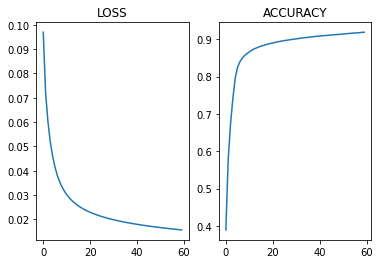

In [89]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(hist.history['loss'])
ax[0].set_title("LOSS")
ax[1].plot(hist.history['accuracy'])
ax[1].set_title("ACCURACY")

plt.show()

In [90]:
result = model.evaluate(x_test, y_test, verbose=0)

print('# samples  : ', y_test.shape[0])
print('accuracy   :  %2.2f %%'% (result[1]*100.0))
print('error rate :  %2.2f %%'% (result[0]*100.0))
print('learning time : % 2.2f s'% ((end_time-start_time)))

# samples  :  10000
accuracy   :  92.33 %
error rate :  1.49 %
learning time :  145.62 s


## Results with last layer : sigmoid activation and mse loss function

- number of samples  :  10000
- accuracy   :  92.20 %
- error rate :  1.51 %
- learning time :  255.47 s


